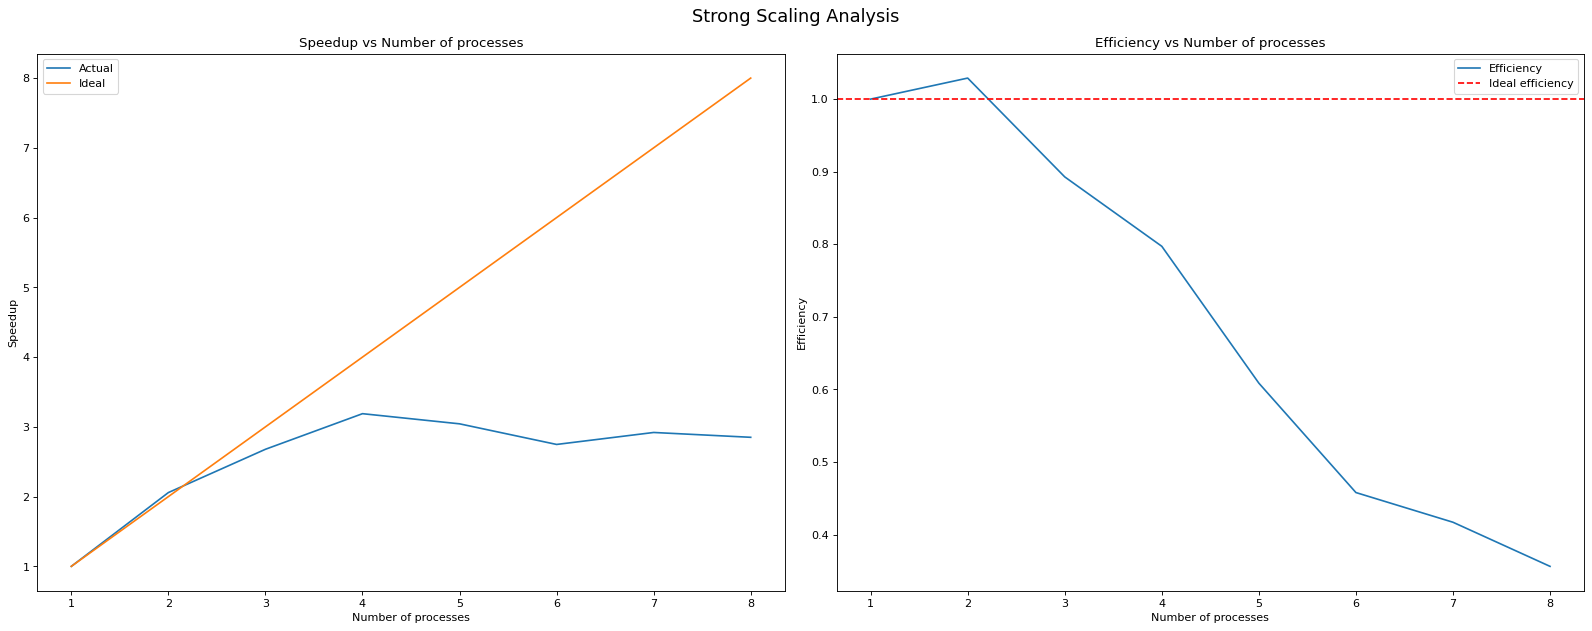

In [2]:
import multiprocessing as mp
import time
import matplotlib.pyplot as plt
import numpy as np
from square import sqrt

if __name__ == "__main__":
    # Create a list of inputs
    np.random.seed(4)

    inputs = list(range(1, 100000))

    # Initialize lists to hold timing results
    times = []

    # Loop over several process counts, up to 32 processes
    for i in range(1, min(mp.cpu_count(), 32) + 1):  # The min function is used to prevent asking for more processes than available
        # Create a process pool
        pool = mp.Pool(processes=i)

        # Start the timer
        start_time = time.time()

        # Execute the function in parallel
        results = pool.map(sqrt, inputs)

        # Stop the timer
        end_time = time.time()

        # Record the elapsed time
        times.append(end_time - start_time)

        # Close the pool
        pool.close()
        pool.join()

    # Calculate speedup
    speedup = [times[0] / t for t in times]

    # Set the resolution of the figure
    plt.figure(figsize=(20, 8), dpi=80)
    plt.suptitle("Strong Scaling Analysis", fontsize=16)

    plt.subplot(1, 2, 1)
    plt.title("Speedup vs Number of processes")
    plt.plot(range(1, len(times) + 1), speedup, label="Actual")
    plt.plot(range(1, len(times) + 1), range(1, len(times) + 1), label="Ideal")
    plt.xlabel('Number of processes')
    plt.ylabel('Speedup')
    plt.legend()

    # Calculate and plot efficiency
    efficiency = [s / p for s, p in zip(speedup, range(1, len(times) + 1))]

    plt.subplot(1, 2, 2)
    plt.title("Efficiency vs Number of processes")
    plt.plot(range(1, len(efficiency) + 1), efficiency, label="Efficiency")
    plt.axhline(y=1, color='r', linestyle='--', label="Ideal efficiency")
    plt.xlabel('Number of processes')
    plt.ylabel('Efficiency')
    plt.legend()

    plt.tight_layout()
    plt.show()


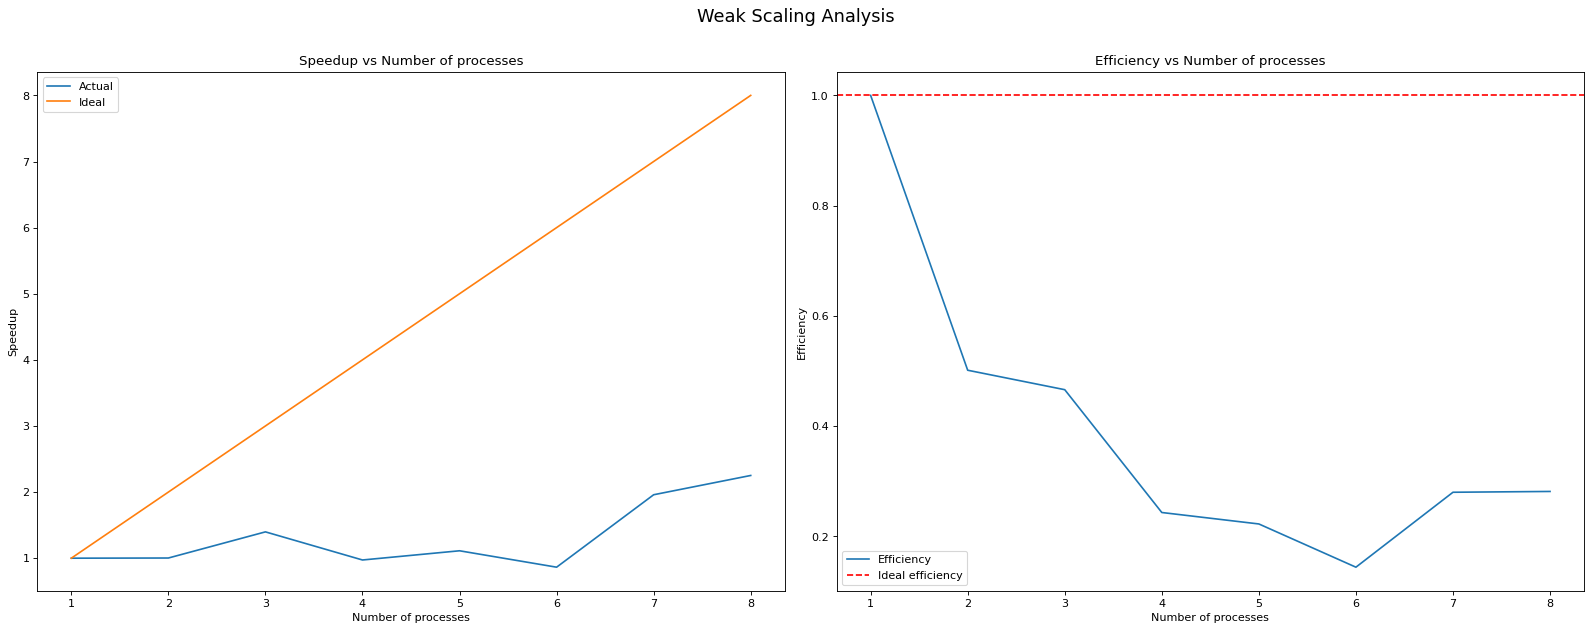

In [49]:
import multiprocessing as mp
import time
import matplotlib.pyplot as plt
import numpy as np
from square import sqrt
if __name__ == "__main__":
    # Initialize lists to hold timing results
    times = []
    np.random.seed(10)


    # Loop over several process counts, up to 32 processes
    for i in range(1, min(mp.cpu_count(), 32) + 1):  
        # Create a process pool
        pool = mp.Pool(processes=i)

        # Create a list of inputs, proportional to number of processes
        inputs = list(range(1, 18000 * i))  # each process gets roughly 100000 inputs

        # Start the timer
        start_time = time.time()

        # Execute the function in parallel
        results = pool.map(sqrt, inputs)

        # Stop the timer
        end_time = time.time()

        # Record the elapsed time
        times.append(end_time - start_time)

        # Close the pool
        pool.close()
        pool.join()

    # Calculate speedup
    speedup = [times[0] / t for t in times]

    # Set the resolution of the figure
    plt.figure(figsize=(20, 8), dpi=80)

    plt.suptitle("Weak Scaling Analysis", fontsize=16)
    
    plt.subplot(1, 2, 1)
    plt.title("Speedup vs Number of processes")
    plt.plot(range(1, len(times) + 1), speedup, label="Actual")
    plt.plot(range(1, len(times) + 1), range(1, len(times) + 1), label="Ideal")
    plt.xlabel('Number of processes')
    plt.ylabel('Speedup')
    plt.legend()

    # Calculate and plot efficiency
    efficiency = [s / p for s, p in zip(speedup, range(1, len(times) + 1))]

    plt.subplot(1, 2, 2)
    plt.title("Efficiency vs Number of processes")
    plt.plot(range(1, len(efficiency) + 1), efficiency, label="Efficiency")
    plt.axhline(y=1, color='r', linestyle='--', label="Ideal efficiency")
    plt.xlabel('Number of processes')
    plt.ylabel('Efficiency')
    plt.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()
